<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Mt_Fuji_descent_issue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

csv_path = "https://raw.githubusercontent.com/nklbigone/Mt-fujii/main/mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

[Problem 1] Data visualization

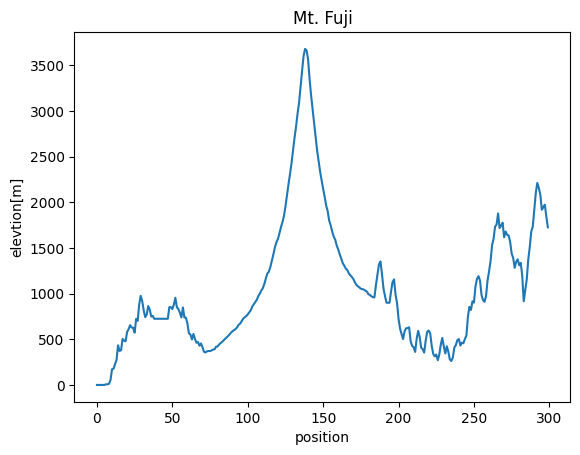

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("position")
plt.ylabel("elevtion[m]")
plt.title("Mt. Fuji")
plt.plot(fuji[:,3])
plt.show()

---

[Problem 2] Create a function to calculate the gradient at a certain point

In [ ]:
def point_gradient(a, b):
    """
    Calculate the gradient at a certain point.

    Parameters
    ----------------
    a : tuple, (x1, y1)
      The number (x1) and elevation (y1) of the previous point (current point - 1).
    b : tuple, (x2, y2)
      The number (x2) and elevation (y2) of the current point.

    Returns
    ----------------
    float
      The gradient at the current point.
    """
    return np.divide(*reversed(np.subtract(b, a)))

In [ ]:
# The previous function can be simplied.
# point_gradient = lambda a, b: np.divide(*reversed(np.subtract(b, a)))

In [ ]:
point_gradient(*fuji[135:137, [0,3]]) # Gradient at the 136th location.

168.35000000000036

---

[Problem 3] Create a function to calculate the destination point

In [ ]:
def destination_point(a, b, r=0.2):
    """
    Calculate the destination point.

    Parameters
    ----------------
    a : tuple, (x1, y1)
      The number (x1) and elevation (y1) of the previous point (current point - 1).
    b : tuple, (x2, y2)
      The number (x2) and elevation (y2) of the current point.
    r : float
      Hyperparameter (learning rate).

    Returns
    ----------------
    d : int
      The destination point number.

    Raises
    ----------------
    ValueError
      If the destination point is negative.
    """
    d = round(b[0] - r*point_gradient(a,b))
    if d < 0:
      raise ValueError("Destination point cannot be negative.")
    return d

In [ ]:
destination_point(*fuji[135:137, [0,3]]) # Destination point from the 136th location.

102

---

[Problem 4] Create a function to go down the mountain

In [ ]:
def go_down_mountain(xy, a = 136, r = 0.2):
    """
    A function that goes down the mountain.

    Parameters
    ----------------
    a : int
      The first point from which to go down the mountain.
    xy : numpy.ndarray, shape(n,2)
      The (x, y) coordinates of the points with x their number and y their elevation.
    r : float
      Hyperparameter (learning rate).

    Returns
    ----------------
    moves : list
      The recording of the points for each move.
    """
    moves = [a]
    while True:
      c = moves[-1]                          # current point
      d = destination_point(*xy[c-1:c+1], r) # destination point
      if d in moves:
        break
      moves.append(d)
    return moves

In [ ]:
go_down_mountain(fuji[:,[0,3]])

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]

---

[Problem 5] Visualization of the descent process

In [ ]:
path = go_down_mountain(fuji[:,[0,3]])
slopes = [point_gradient(*fuji[p-1:p+1, [0,3]]) for p in path]

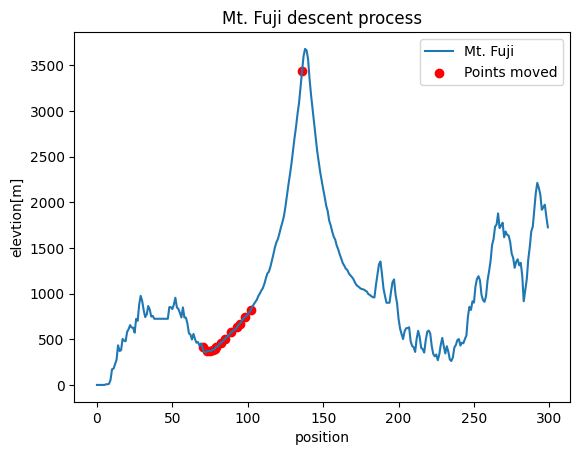

In [ ]:
# Points moved in the cross section as dots.
plt.xlabel("position")
plt.ylabel("elevtion[m]")
plt.title("Mt. Fuji descent process")
plt.plot(fuji[:,3], label="Mt. Fuji")
plt.scatter(path, fuji[path,3], label="Points moved", color='r')
plt.legend()
plt.show()

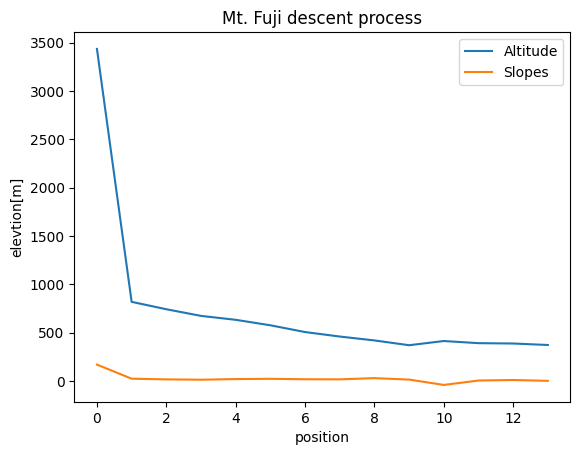

In [ ]:
# Line graph of altitude and slope for each repetition
plt.xlabel("position")
plt.ylabel("elevtion[m]")
plt.title("Mt. Fuji descent process")
plt.plot(fuji[path,3], label="Altitude")
plt.plot(slopes, label="Slopes")
plt.legend()
plt.show()

---

[Problem 6] Change of initial value

In [ ]:
valid_initial_values = []
invalid_initial_values = []
valid_paths = []
for i in fuji[:,0]:
  try:
    path = go_down_mountain(fuji[:,[0,3]], a=int(i))
    valid_paths.append(path)
    valid_initial_values.append(i)
  except Exception:
    invalid_initial_values.append(i)
    continue
print("We can successfully go down the mountain from {} points which are:\n{}".format(len(valid_initial_values), valid_initial_values))

We can successfully go down the mountain from 273 points which are:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 12.0, 13.0, 15.0, 18.0, 19.0, 21.0, 22.0, 24.0, 25.0, 27.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 

---

[Problem 7] Visualization of the descent process for each initial value

_Here, we visualize the descent process for three arbitrary valid initial values._

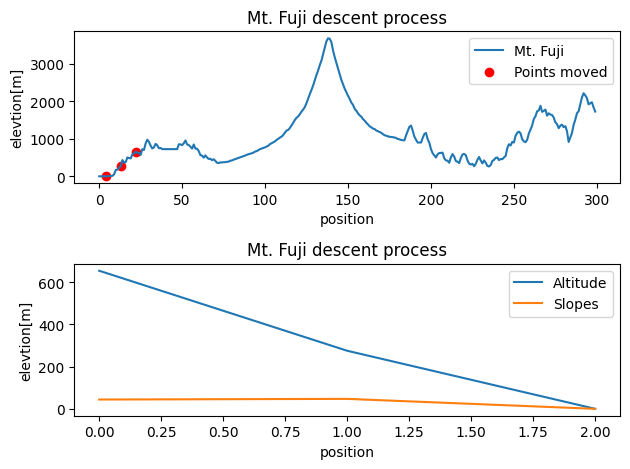

In [ ]:
fig, axs = plt.subplots(2)
first_path = valid_paths[15]
first_slopes = [point_gradient(*fuji[p-1:p+1, [0,3]]) for p in first_path ]

# Points moved in the cross section as dots.
axs[0].set_xlabel("position")
axs[0].set_ylabel("elevtion[m]")
axs[0].set_title("Mt. Fuji descent process")
axs[0].plot(fuji[:,3], label="Mt. Fuji")
axs[0].scatter(first_path, fuji[first_path,3], label="Points moved", color='r')
axs[0].legend()

# Line graph of altitude and slope for each repetition
axs[1].set_xlabel("position")
axs[1].set_ylabel("elevtion[m]")
axs[1].set_title("Mt. Fuji descent process")
axs[1].plot(fuji[valid_paths[15],3], label="Altitude")
axs[1].plot(first_slopes, label="Slopes")
axs[1].legend()

plt.tight_layout()
plt.show()

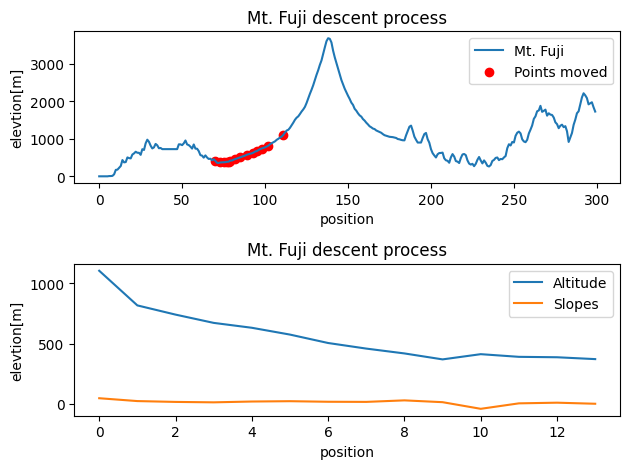

In [ ]:
fig, axs = plt.subplots(2)
first_path = valid_paths[100]
first_slopes = [point_gradient(*fuji[p-1:p+1, [0,3]]) for p in first_path ]

# Points moved in the cross section as dots.
axs[0].set_xlabel("position")
axs[0].set_ylabel("elevtion[m]")
axs[0].set_title("Mt. Fuji descent process")
axs[0].plot(fuji[:,3], label="Mt. Fuji")
axs[0].scatter(first_path, fuji[first_path,3], label="Points moved", color='r')
axs[0].legend()

# Line graph of altitude and slope for each repetition
axs[1].set_xlabel("position")
axs[1].set_ylabel("elevtion[m]")
axs[1].set_title("Mt. Fuji descent process")
axs[1].plot(fuji[valid_paths[100],3], label="Altitude")
axs[1].plot(first_slopes, label="Slopes")
axs[1].legend()

plt.tight_layout()
plt.show()

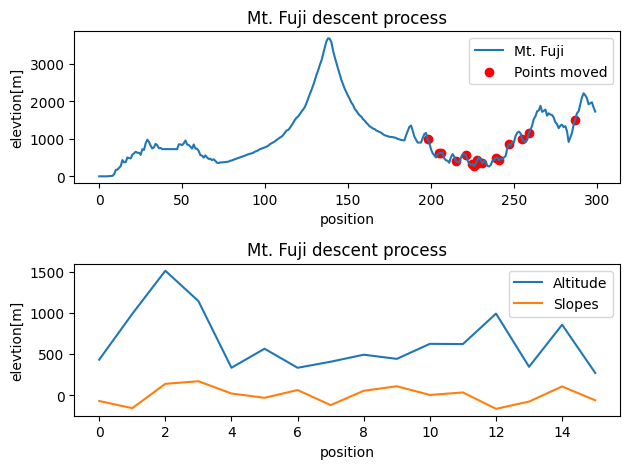

In [ ]:
fig, axs = plt.subplots(2)
first_path = valid_paths[230]
first_slopes = [point_gradient(*fuji[p-1:p+1, [0,3]]) for p in first_path ]

# Points moved in the cross section as dots.
axs[0].set_xlabel("position")
axs[0].set_ylabel("elevtion[m]")
axs[0].set_title("Mt. Fuji descent process")
axs[0].plot(fuji[:,3], label="Mt. Fuji")
axs[0].scatter(first_path, fuji[first_path,3], label="Points moved", color='r')
axs[0].legend()

# Line graph of altitude and slope for each repetition
axs[1].set_xlabel("position")
axs[1].set_ylabel("elevtion[m]")
axs[1].set_title("Mt. Fuji descent process")
axs[1].plot(fuji[valid_paths[230],3], label="Altitude")
axs[1].plot(first_slopes, label="Slopes")
axs[1].legend()

plt.tight_layout()
plt.show()

---

[Problem 8] (Advance problem) Hyperparameter changes

In [ ]:
path = go_down_mountain(fuji[:,[0,3]], r=0.6)
slopes = [point_gradient(*fuji[p-1:p+1, [0,3]]) for p in path ]

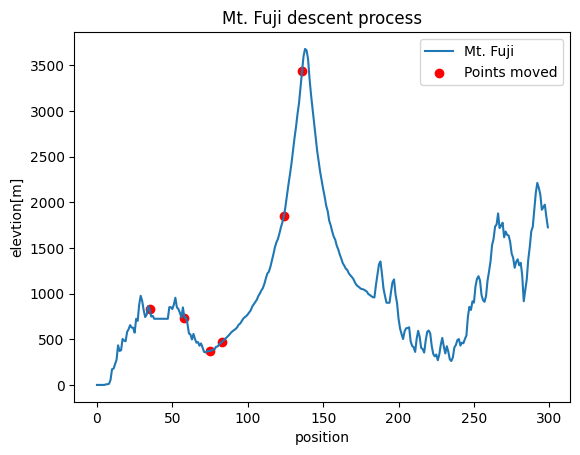

In [ ]:
# Points moved in the cross section as dots.
plt.xlabel("position")
plt.ylabel("elevtion[m]")
plt.title("Mt. Fuji descent process")
plt.plot(fuji[:,3], label="Mt. Fuji")
plt.scatter(path, fuji[path,3], label="Points moved", color='r')
plt.legend()
plt.show()

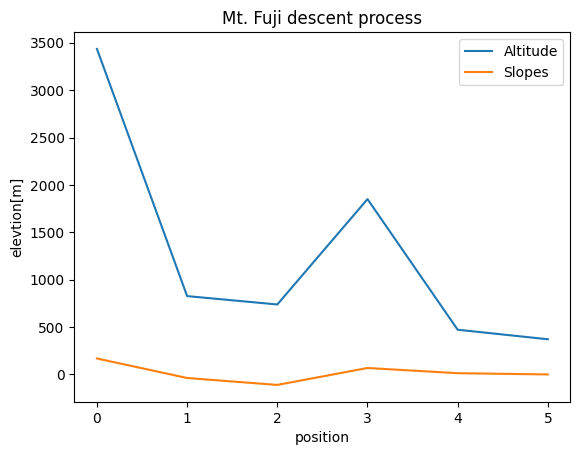

In [ ]:
# Line graph of altitude and slope for each repetition
plt.xlabel("position")
plt.ylabel("elevtion[m]")
plt.title("Mt. Fuji descent process")
plt.plot(fuji[path,3], label="Altitude")
plt.plot(slopes, label="Slopes")
plt.legend()
plt.show()